In [23]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats




In [24]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

print(f'The are {len(kaggle_spot_df)} songs in this this data set')
kaggle_spot_df.head()

The are 169909 songs in this this data set


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


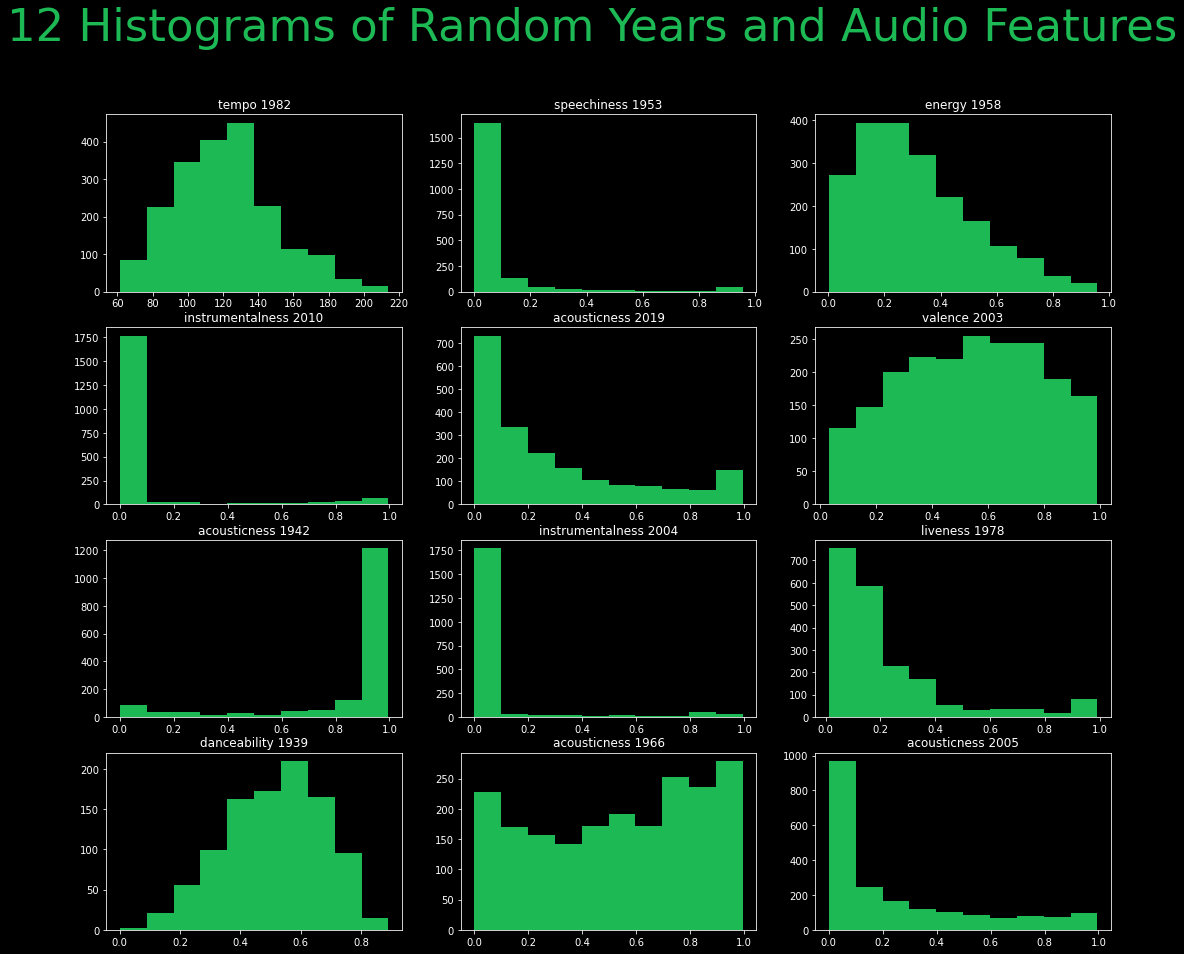

In [25]:
#review histograms of random year for 12 random spotify metrics. 

#creates a list of each year
years_list=kaggle_spot_df['year'].unique().tolist()

#list of each metric
metric_list=['acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']

##### creates 12 histograms for random years and audio features
fig_h=plt.figure(figsize=(18,15),facecolor='black')
fig_h.suptitle('12 Histograms of Random Years and Audio Features',color='#1DB954',fontsize=45)

for t in range(1,13):

    rando_year=random.choice(years_list)
    rando_metric=random.choice(metric_list)
    ax_h=fig_h.add_subplot(4,3,t)
    ax_h.spines['bottom'].set_color('white')
    ax_h.spines['top'].set_color('white')
    ax_h.spines['right'].set_color('white')
    ax_h.spines['left'].set_color('white')
    ax_h.tick_params(axis='x', colors='white')
    ax_h.tick_params(axis='y', colors='white')
    ax_h.yaxis.label.set_color('white')
    ax_h.xaxis.label.set_color('white')
    ax_h.title.set_color('white')
    ax_h.patch.set_alpha(0)
    plt.title(str(rando_metric)+' '+str(rando_year))
    histy=kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][rando_metric]
    plt.hist(histy,color='#1DB954')
plt.show()
 


In [26]:
### samples 10 random years for each audio features generating the P value for each...
# ... finds the average pvalue for each auido feature to determine if the audio feature is normally distributed

## adding the year for easier graphing in next cell
mean_graph_metric_list=['year']
median_graph_metric_list=['year']

alpha = 1e-3
# alpha= 0.05

# loop through a list of each audio feature(or metric)
for metric in metric_list:
    p_values_list=[]

    #we're gonna take this number of samples for each feature
    for a in range(10):
        #make a random year
        rando_year=random.choice(years_list)
        
        #run the normal test on a random year and the current audiot feature
        k2, p =stats.normaltest(kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][metric])

        p_values_list.append(p)

    #average of p values samples for current metric
    p_val_avg=sum(p_values_list)/len(p_values_list)

    # is it normally distributed or not? put the audio feature in the right list accordingly
    if p_val_avg < alpha:
        median_graph_metric_list.append(metric)
    else:
        mean_graph_metric_list.append(metric)


In [27]:

### creates a dataframe with the annual mean or median

## importing this from pandas to address DataError issue
from pandas.core.groupby.groupby import DataError
## added try block since mean list is empty sometimes
try:
    #dataframe of median metrics to be graphed
    median_annual_metrics_df=kaggle_spot_df[median_graph_metric_list].groupby('year').median()
    #dataframe of mean metrics to be graphed
    mean_annual_metrics_df=kaggle_spot_df[mean_graph_metric_list].groupby('year').mean()
    #merges the median dataframe and the mean dataframe together
    annual_metrics_df=pd.merge(median_annual_metrics_df,mean_annual_metrics_df,on='year')
except :
    print('one of these lists were empty')
    annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').median()



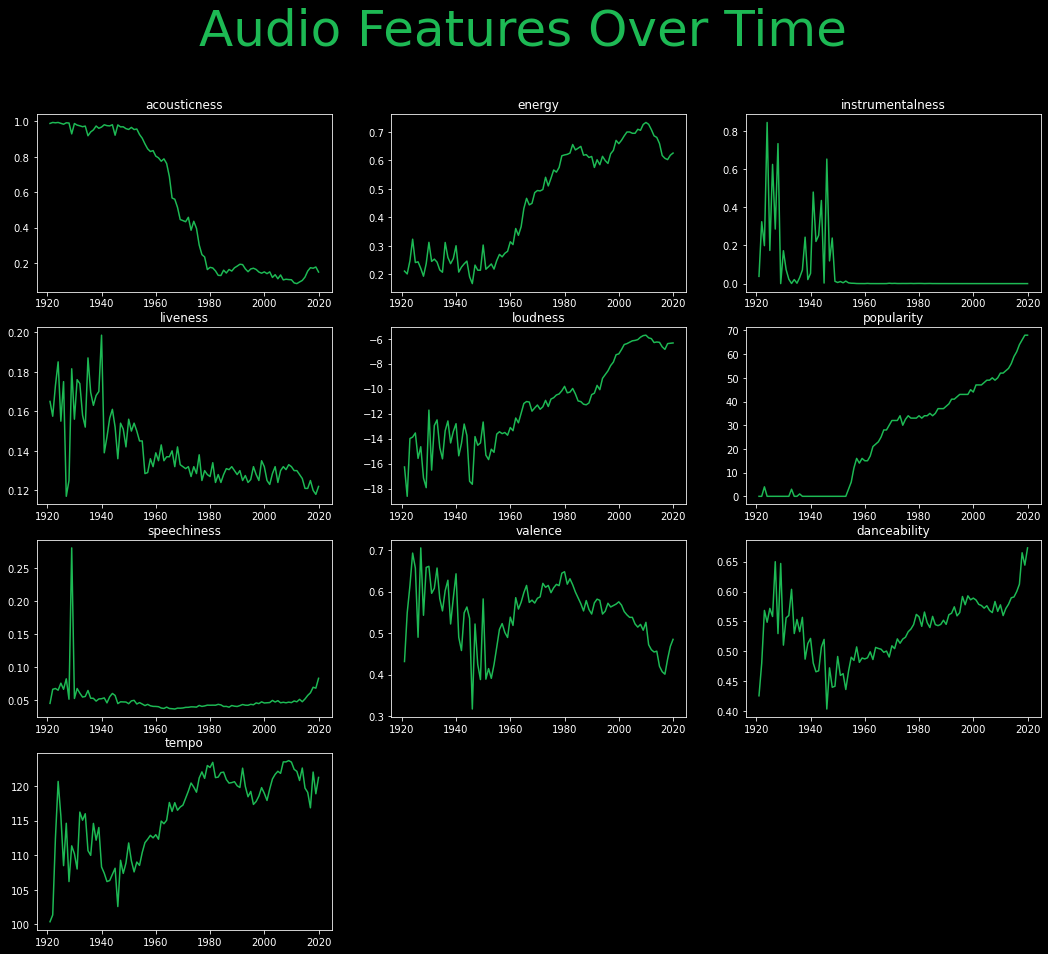

In [28]:


#graphs the average of each feature over time
def over_time_graphy(df):
    #turns the metric names into a list
    spot_metric_names=df.columns.to_list()
    ### plots graphs 4 by 3 with spotify colors
    fig = plt.figure(figsize=(18,15),facecolor='black')

    fig.suptitle('Audio Features Over Time',fontsize=50,color='#1DB954')
    for i in range(1,11):
        ax=fig.add_subplot(4,3,i)
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.patch.set_alpha(0)
        x=df.index
        y=df.iloc[:,i-1]
        plt.plot(x,y,c='#1DB954')
        plt.title(spot_metric_names[i-1])
    return plt.show()
over_time_graphy(annual_metrics_df)



In [29]:
##### noticing the significant drop in valense around 1942, I"m wondering if this could be because the war.a

just_sad_year=annual_metrics_df.loc[annual_metrics_df['valence']==annual_metrics_df['valence'].min(),:]

just_sad_year

,acousticness,energy,instrumentalness,liveness,loudness,popularity,speechiness,valence,danceability,tempo
year,,,,,,,,,,
1946,0.98,0.167,0.653,0.136,-17.656,0.0,0.0451,0.317,0.403515,102.590531


In [37]:
### sad songs in 1946

xo=just_sad_year['valence'].values
sad_value=xo[0]


four_six=kaggle_spot_df.loc[(kaggle_spot_df['year']==1946)&(kaggle_spot_df['valence']<sad_value),:]

four_six


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
655,0.993,"['Frédéric Chopin', 'Arthur Rubinstein']",0.289,260173,0.0880,0,4ksdJGB1CachVl9I937uZI,0.928000,11,0.1100,-22.613,1,"Mazurkas, Op. 56: No. 1 in B Major",3,1946,0.0427,109.662,0.1630,1946
656,0.937,"['Johannes Brahms', 'Gregor Piatigorsky', 'Alf...",0.311,886640,0.1850,0,4l230yPKIYbPXMnY6snVXD,0.643000,0,0.1180,-15.806,1,"Concerto in A Minor for Violin and Cello, Op. ...",0,1946,0.0390,129.048,0.1790,1946
657,0.989,"['Franz Schubert', 'Eugene Istomin']",0.238,363067,0.0876,0,4lMRzRq5IeWcTgPVG91quE,0.916000,6,0.0894,-23.670,1,"Four Impromtus, Op. 90, D. 899: No. 3. Andante...",1,1946,0.0322,64.225,0.0609,1946
659,0.971,"['George Frideric Handel', 'The Liverpool Phil...",0.499,29427,0.0939,0,4mBj1MyvPgXIs77sUU2M87,0.000017,7,0.2000,-22.778,1,"Messiah, HWV 56, Pt. 1: Then shall the eyes of...",0,1946,0.0448,103.023,0.0588,1946
661,0.529,"['Maurice Ravel', 'Pierre Monteux']",0.230,72893,0.1620,0,4md5ckkdSH4n8yW9MKTwkl,0.000405,8,0.3400,-18.945,0,"Valses nobles et sentimentales, M. 61: V. Pres...",0,1946,0.0383,93.503,0.2300,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162547,0.907,"['George Frideric Handel', 'The Liverpool Phil...",0.208,173067,0.0868,0,4edXohiz8y1AOwcCWFpbQx,0.696000,9,0.2060,-21.738,1,"Messiah, HWV 56, Pt. 1: For behold, darkness s...",0,1946,0.0403,99.595,0.0366,1946
162549,0.958,['University of North Texas Symphony Orchestra'],0.195,196627,0.1590,0,4glwNrxxdLAuJJMAip78QD,0.873000,7,0.1360,-18.424,1,มโนราห์: ภิรมย์รัก,1,1946-12-02,0.0323,102.958,0.0393,1946
162553,0.995,"['Claude Debussy', 'Robert Casadesus']",0.386,171907,0.1440,0,4hkRRrr8PZtnQvAj8zXqRi,0.941000,9,0.1200,-20.495,0,"2 Arabesques, L. 66: II. Allegretto Scherzando",0,1946,0.0464,80.871,0.3110,1946
162554,0.946,"['Giacomo Puccini', 'Luciano Pavarotti', 'Emer...",0.167,188373,0.2980,0,4iHancsAdLbjvV3kA0FFW3,0.000118,2,0.9610,-15.500,1,Turandot: Nessun dorma,1,1946,0.0891,172.142,0.2310,1946


In [6]:
#Based on the graph above, lets look at the peak year for speechiness

speech_peak= annual_metrics_df.loc[annual_metrics_df['speechiness']==annual_metrics_df['speechiness'].max(),:]
speech_peak

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,valence,tempo
year,,,,,,,,,,
1929,0.9295,0.688,0.237,0.0,0.1815,-17.929,0.0,0.28,0.6585,111.353988


In [13]:
### ok, lets look at all songs in that outlier year that are more speech than average


two_nine=kaggle_spot_df.loc[kaggle_spot_df['year']==1928,:]


two_nine



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161665,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.277,490133,0.0123,0,6IZSVbI8WfOgrigjLS8CA9,0.943000,5,0.0755,-28.133,0,Concerto Without Orchestra (Grand Sonata No. 3...,0,1928,0.0561,82.057,0.0946,1928
161666,0.990,"['Gioachino Rossini', 'Koloman von Pataky', 'U...",0.283,229882,0.1930,0,6IdRKwi1hzkekoqPDd0MIL,0.000033,0,0.4590,-13.608,1,"Il barbiere di Siviglia: Ecco, ridente in cielo",0,1928-01-01,0.0568,79.161,0.2620,1928
161667,0.994,"['Frédéric Chopin', 'Vladimir Horowitz']",0.382,461347,0.2050,0,6JFq3aShxlO5CyF2FrYXCr,0.907000,11,0.6960,-17.035,1,"Scherzo No. 1 in B Minor, Op. 20",0,1928,0.0407,105.782,0.1180,1928
161668,0.492,['Shungi Music Crew'],0.771,370341,0.8180,0,6Jg1cMlHS3xaexvhjXcWGT,0.810000,9,0.3480,-6.214,0,Cant Be There,0,1928-08-20,0.0663,122.202,0.4550,1928


In [15]:
## looks at the speechiest song

most_speechy_song=two_nine.loc[two_nine['speechiness']==two_nine['speechiness'].max(),:]

most_speechy_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
161590,0.845,['Seweryn Goszczyński'],0.702,103500,0.195,0,5hfh3Q5mdKVyIfx2hkxey2,0.0,1,0.165,-20.090,0,Chapter 3.6 - Zamek kaniowski,0,1928,0.963,53.395,0.758,1928
161618,0.794,['Seweryn Goszczyński'],0.630,110300,0.261,0,5vwiIUF6Kq64QPP3mQ8IUN,0.0,1,0.225,-19.624,1,Chapter 2.2 - Zamek kaniowski,0,1928,0.963,168.771,0.648,1928


In [17]:
#### some speechy songs

xyz =two_nine.loc[two_nine['speechiness']>two_nine['speechiness'].median(),:]
xyz

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161658,0.992,['Ignacio Corsini'],0.442,155667,0.2280,0,6ESRly7Y9zlnkuHzbMJMvM,0.944000,8,0.1110,-22.663,1,Altar Criollo - Remasterizado,0,1928-05-14,0.0631,74.539,0.8170,1928
161665,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.277,490133,0.0123,0,6IZSVbI8WfOgrigjLS8CA9,0.943000,5,0.0755,-28.133,0,Concerto Without Orchestra (Grand Sonata No. 3...,0,1928,0.0561,82.057,0.0946,1928
161666,0.990,"['Gioachino Rossini', 'Koloman von Pataky', 'U...",0.283,229882,0.1930,0,6IdRKwi1hzkekoqPDd0MIL,0.000033,0,0.4590,-13.608,1,"Il barbiere di Siviglia: Ecco, ridente in cielo",0,1928-01-01,0.0568,79.161,0.2620,1928
161668,0.492,['Shungi Music Crew'],0.771,370341,0.8180,0,6Jg1cMlHS3xaexvhjXcWGT,0.810000,9,0.3480,-6.214,0,Cant Be There,0,1928-08-20,0.0663,122.202,0.4550,1928


In [19]:
abc=xyz.groupby('artists').count()
abc


,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
artists,,,,,,,,,,,,,,,,,,
['Agustin Magaldi'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"['Alexander Scriabin', 'Vladimir Horowitz']",14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
['Allen Shaw'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
['Arletty'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
['Benny Goodman Big Band'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
['The Collince'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['Thomas Arne', 'John Heddle Nash']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
['Toy Souljah'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
